# ANALYSIS AND VISUALISATION

## Loading and cleaning the data

In [2]:
# Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp

import math
import statistics
import json

from wordcloud import WordCloud
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

First step is loading the data that we have obtained using the API

In [3]:
# Loading the data 

a = json.load(open('playlists.json'))

### Exception handling

If this loop is not runned, .duplicated(), .drop_duplicates()... raise a “TypeError: unhashable type: 'list'”

In [4]:
# This simply changes artist_genres from a list to a tuple

for item in a:
    item['artist_genres'] = tuple(item['artist_genres'])

Before we can start cleaning the data, we need to shape it as a dataframe. In order to do that, we will use json_normalize since it allows you to flatten the hierarchy of the json

In [5]:
# Turning JSON into a DATAFRAME

df = pd.DataFrame(a)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,track_href,analysis_url,duration_ms,time_signature,country_playlist,track_name,popularity,artist,artist_genres,album_release
0,0.668,0.758,5,-5.176,0,0.0332,0.4830,0.000019,0.0837,0.834,...,https://api.spotify.com/v1/tracks/3qQbCzHBycnD...,https://api.spotify.com/v1/audio-analysis/3qQb...,165671,3,Global,Ella Baila Sola,90,Eslabon Armado,"(corrido, corridos tumbados, nueva musica mexi...",2023-04-28
1,0.569,0.724,6,-4.076,0,0.0474,0.2280,0.000000,0.2700,0.562,...,https://api.spotify.com/v1/tracks/6pD0ufEQq0xd...,https://api.spotify.com/v1/audio-analysis/6pD0...,194563,4,Global,un x100to,100,Grupo Frontera,"(musica chihuahuense, nueva musica mexicana)",2023-04-17
2,0.812,0.479,2,-5.678,0,0.3330,0.2130,0.000001,0.0756,0.559,...,https://api.spotify.com/v1/tracks/2UW7JaomAMuX...,https://api.spotify.com/v1/audio-analysis/2UW7...,234353,4,Global,La Bebe - Remix,99,Yng Lvcas,(),2023-03-17
3,0.783,0.592,11,-8.332,0,0.0331,0.4350,0.000004,0.3470,0.726,...,https://api.spotify.com/v1/tracks/7FbrGaHYVDmf...,https://api.spotify.com/v1/audio-analysis/7Fbr...,174253,4,Global,Cupid - Twin Ver.,98,FIFTY FIFTY,"(k-pop girl group,)",2023-02-24
4,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,...,https://api.spotify.com/v1/tracks/4DHcnVTT87F0...,https://api.spotify.com/v1/audio-analysis/4DHc...,200455,4,Global,Flowers,91,Miley Cyrus,"(pop,)",2023-03-10


Confirming that we got 50 tracks per playlist

In [4]:
df['country_playlist'].value_counts()

country_playlist
Global          50
USA             50
UK              50
Australia       50
India           50
South Africa    50
Name: count, dtype: int64

Checking for duplicated rows. 

In [5]:
df.duplicated().value_counts()

False    300
Name: count, dtype: int64

> As we can see, there no duplicates

In [7]:
df.isna().value_counts()

danceability  energy  key    loudness  mode   speechiness  acousticness  instrumentalness  liveness  valence  tempo  type   id     uri    track_href  analysis_url  duration_ms  time_signature  country_playlist  track_name  popularity  artist  artist_genres  album_release
False         False   False  False     False  False        False         False             False     False    False  False  False  False  False       False         False        False           False             False       False       False   False          False            300
Name: count, dtype: int64

> Similarly, there are no empty rows

Overall, getting the data using Spotify API allowed us to have a relatively clean dataset that contained the variables that we were interested in. Cleanig the dataset could have taken considerably more time if we would have chosen a pre-existing dataset. 

## Exploring the data

First, we would like to get an overview of the data:


In [221]:
# Shape of the data

print(f'The shape of the data is: {df.shape}')

# Type of the data

print(f'The type of the data is: {type(df)}')

# Overview of the first 5 rows of the data:

print(f'The first 5 rows are: {df.head(5)}')

The shape of the data is: (300, 24)
The type of the data is: <class 'pandas.core.frame.DataFrame'>
The first 5 rows are:    danceability  energy  key  loudness  mode  speechiness  acousticness   
0         0.668   0.758    5    -5.176     0       0.0332        0.4830  \
1         0.569   0.724    6    -4.076     0       0.0474        0.2280   
2         0.812   0.479    2    -5.678     0       0.3330        0.2130   
3         0.783   0.592   11    -8.332     0       0.0331        0.4350   
4         0.707   0.681    0    -4.325     1       0.0668        0.0632   

   instrumentalness  liveness  valence  ...   
0          0.000019    0.0837    0.834  ...  \
1          0.000000    0.2700    0.562  ...   
2          0.000001    0.0756    0.559  ...   
3          0.000004    0.3470    0.726  ...   
4          0.000005    0.0322    0.646  ...   

                                          track_href   
0  https://api.spotify.com/v1/tracks/3qQbCzHBycnD...  \
1  https://api.spotify.com/v1/tra

In [222]:
# Keys of the dataset

print (f'The keys: {df.keys()}')


# Number of rows and columns in the dataset

rows = df.shape[0]
columns = df.shape[1]

print (f'The number of rows are: {rows}. The number of columns are: {columns}')


# Basic information on what the data type is for each column
print(df.info())


# Basic statistical description of the data for numerical variables

print(df.describe())

The keys: Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'country_playlist', 'track_name', 'popularity',
       'artist', 'artist_genres', 'album_release'],
      dtype='object')
The number of rows are: 300. The number of columns are: 24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      300 non-null    float64
 1   energy            300 non-null    float64
 2   key               300 non-null    int64  
 3   loudness          300 non-null    float64
 4   mode              300 non-null    int64  
 5   speechiness       300 non-null    float64
 6   acousticness      300 non-null    float64
 7   instrumentalness  300 non-nu

## Analysis of the data

### Similarities across playlists

We would like to identify the top 10 songs that appear in many of the playlists as well as the similarities of the playlist to the Global.

In [59]:
fp = df.loc[df["country_playlist"] != 'Global']

frequencies_tracks = fp['track_name'].value_counts(ascending = False).head(10)

frequencies_tracks

track_name
Calm Down (with Selena Gomez)             5
Flowers                                   4
All My Life (feat. J. Cole)               4
No Role Modelz                            4
Kill Bill                                 4
Creepin' (with The Weeknd & 21 Savage)    4
Cupid - Twin Ver.                         4
Sure Thing                                4
Boy's a Liar Pt. 2                        4
Daylight                                  4
Name: count, dtype: int64

In [60]:
# Identify which ones are not in the global playlist
glob = df.loc[df['country_playlist'] == 'Global']


is_in_glob = {}

for track in frequencies_tracks.index:
    
    ans = False
    
    if track in glob['track_name'].values:
        
        ans = True
        
    is_in_glob[track] = ans

    
not_in_glob = [key for key,value in is_in_glob.items() if value == False]
not_in_glob

['No Role Modelz', 'Sure Thing']

>'No Role Modelz' and 'Sure Thing' are the only two songs that are present in at least 4 playlists but do not feature in the top 50 Global playlist. This suggests that this songs may be popular across English Speaking languages, but not sufficiently popular globally.

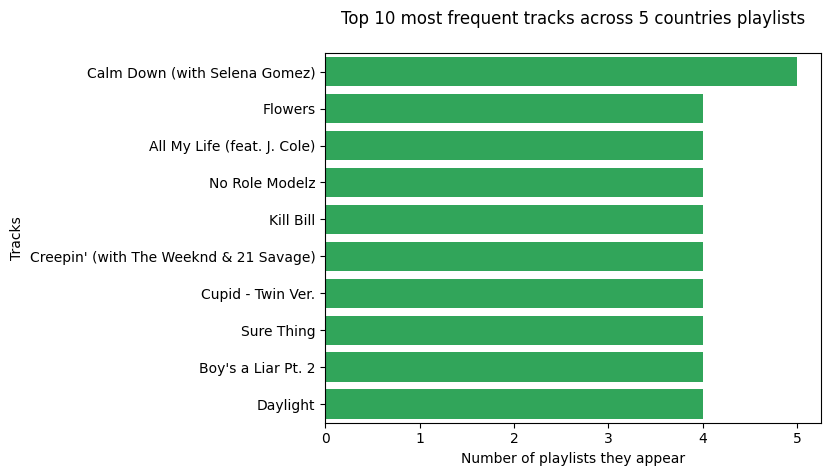

In [62]:
ax = sns.barplot(y = frequencies_tracks.index, 
                 x =  frequencies_tracks.values,
                 color='#1DB954')

ax.set_xlabel('Number of playlists they appear')
ax.set_ylabel("Tracks")
ax.set_title("Top 10 most frequent tracks across 5 countries playlists\n")

ax.figure.savefig('trackpop.pdf', bbox_inches = 'tight')

### Calculating the percentage of similarity of the playlists against the global top 50 playlist based on tracks

In this case, we want to study the similarities in tracks between these playlists and the top50 global playlists.


We start by extracting the data from Global, we will compare against glob['track_name'] the track names of the other playlists. 

In [226]:
glob = df.loc[df['country_playlist'] == 'Global']


d = {} #Empty dictionary to add values into


for country in df['country_playlist']:
    
    if country != 'Global':
    
        check = df.loc[df['country_playlist'] == country]
    
        count = 0

        for track in check['track_name']:
        
            if track in glob['track_name'].values:
            
                count = count + 1

        d[country] = count/50
        
pop_track = pd.DataFrame.from_dict(d, orient = 'index')
pop_track = pop_track.rename(columns={0: "similarity"})

pop_track

,similarity
USA,0.48
UK,0.40
Australia,0.42
India,0.06
South Africa,0.16


>As we can see in this table, almost 50% of the tracks from the USA, UK and Australia playlists are similar to those of the global playlist. On the other hand, India and South Africa present very different tracks to those present on the Global playlist. This difference can potentially be caused by the presence of languages other than English in both South Africa and India.

We can see this data in a visualisation:

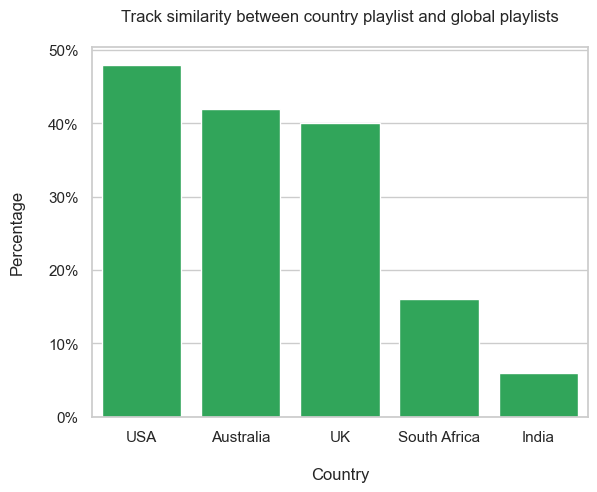

In [227]:
# Tidying up and visualising

ax = sns.barplot(x = pop_track.index, 
                 y = pop_track['similarity'], 
                 color='#1DB954',
                 order = ['USA', 'Australia', 'UK', 'South Africa','India'])

ax.set_title("Track similarity between country playlist and global playlists\n")
ax.set_xlabel("\nCountry")
ax.set_ylabel("Percentage\n")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))


ax.figure.savefig('pop_track.pdf', bbox_inches = 'tight')

### Comparison and distribution of the mean average popularity of the tracks in each playlist

Looking at the parameter popularity, we would like to know what is the mean average popularity of the tracks and how they individually compare to the Global playlist. 

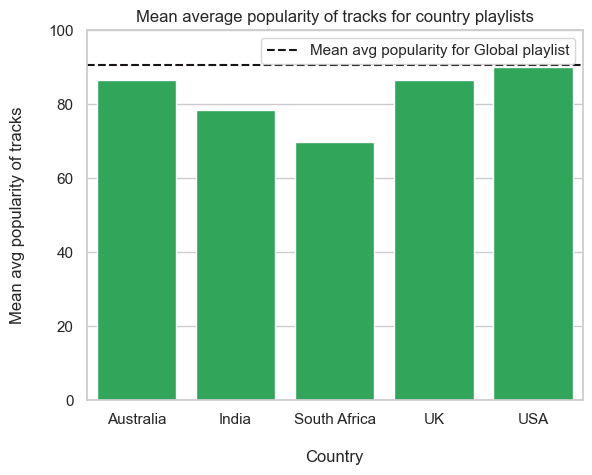

In [228]:

means_all = df.groupby('country_playlist')['popularity'].mean()

# Removing 'Global' to plot it.

means = means_all.drop('Global')


ax = sns.barplot(x = means.index, y=means.values, color ='#1DB954')
ax.set_xlabel('\nCountry')
ax.axhline(y=means_all['Global'], label = "Mean avg popularity for Global playlist", color = '#191414', ls ='--') 
ax.set_ylabel("Mean avg popularity of tracks\n")
ax.set(ylim=(0, 100))
ax.set_title("Mean average popularity of tracks for country playlists")
ax.legend()


ax.figure.savefig('avgpop.pdf',  bbox_inches = 'tight')

The graph allows us to compare the mean average popularity of tracks for each country agains the mean average popularity of tracks in the global playlists.

>We can see very cleary the differences in the mean average of the tracks for each playlist and how they compare to that of the global playlist. 

>The mean average popularity of the tracks of South Africa and India is lower than that of the other playlist and considerbaly lower than the Global.

>The mean average popularity of tracks for USA playlis is almost the same as that of the Global playlist

The following graph allows us to see a distribution of the popularity of tracks in each of the playlists

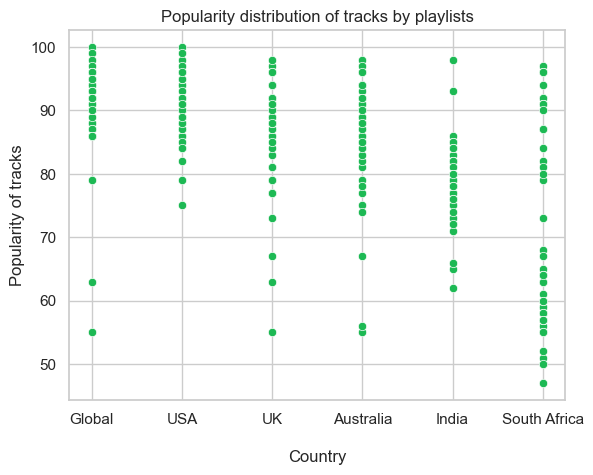

In [230]:

ax = sns.scatterplot(data=df, 
                     x='country_playlist', 
                     y='popularity', 
                     color ='#1DB954', 
                     )

ax.set_xlabel('\nCountry')
ax.set_ylabel("Popularity of tracks")
ax.set_title("Popularity distribution of tracks by playlists")


ax.figure.savefig('popdistribution.pdf', bbox_inches = 'tight')

> This graph is particularly interesting since it shows how the popularity of the tracks in the Global and USA playlist is particularly high and similar. However, for South Aftica, we can see how the top 50 playlist encompasses tracks with relatively low popularity rates. 

>Nevertheless, both in Global, UK and Australia, we can see some tracks for which the popularity is notably lower than the popularity of the rest of the tracks. This points may potentially represent songs that have just made it to the top50 but for which the popularity has not increased yet (in other words, relatively new songs).

### Analysing genres 

We are extracting the data for artist genres from the json. It is easier to do it from the json given that each artist can have different genres.

In [8]:

genres = [] # For storing the genres
for item in a:
    if isinstance(item['artist_genres'], list) and len(item['artist_genres']) > 0:
        genres.extend(item['artist_genres'])
    elif isinstance(item['artist_genres'], str) and item['artist_genres'] != "":
        genres.append(item['artist_genres'])
        
genres

['corrido',
 'corridos tumbados',
 'nueva musica mexicana',
 'sad sierreno',
 'sierreno',
 'musica chihuahuense',
 'nueva musica mexicana',
 'k-pop girl group',
 'pop',
 'gen z singer-songwriter',
 'pop',
 'r&b',
 'rap',
 'pop',
 'reggaeton',
 'reggaeton colombiano',
 'trap latino',
 'urbano latino',
 'colombian pop',
 'pop reggaeton',
 'reggaeton colombiano',
 'trap latino',
 'urbano latino',
 'europop',
 'swedish pop',
 'corrido',
 'nueva musica mexicana',
 'sad sierreno',
 'pop',
 'r&b en espanol',
 'corrido',
 'corridos tumbados',
 'musica mexicana',
 'nueva musica mexicana',
 'sad sierreno',
 'sierreno',
 'rap',
 'trap',
 'hip hop',
 'rap',
 'afrobeats',
 'nigerian pop',
 'latin hip hop',
 'reggaeton',
 'trap latino',
 'urbano latino',
 'canadian contemporary r&b',
 'canadian pop',
 'pop',
 'pop',
 'contemporary country',
 'canadian contemporary r&b',
 'canadian pop',
 'pop',
 'corrido',
 'corridos tumbados',
 'musica mexicana',
 'nueva musica mexicana',
 'sad sierreno',
 'sierren

This function will allow us to make sure that the words in the graph have the colours that we want

In [9]:
# Define the color function
def color_func(word, font_size, position, orientation, random_state, **kwargs):
    colors = ['#1DB954', '#191414']
    return np.random.choice(colors)

The first thing we want to do before the visualisation is to ensure that all the genres are in the correct formatting. Once data is ready to be presented, we use a Word Cloud graph to visualise the frequency of each of the genres

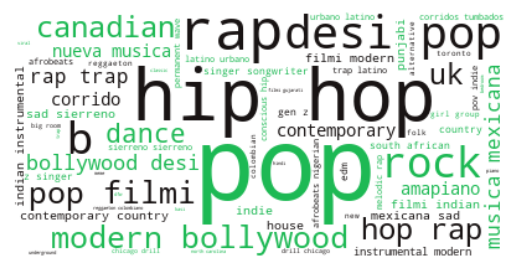

In [12]:
# Convert data into a text string
text = ' '.join(genres)

# Create the WordCloud object with custom color function
wordcloud = WordCloud(color_func=color_func, background_color='white')

# Generate the word cloud
wordcloud.generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

>In this graph, the bigger the word the greater its frequency. Based on that logic, we can see how genres "pop", "hip hop" and "rap", among others, are the most frequent artist genres across the playlists

### Attribute-popularity correlation

We wanted to study if there were any correlations between the different audio features of each track and popularity. For that, we created a matrix of correlations. 

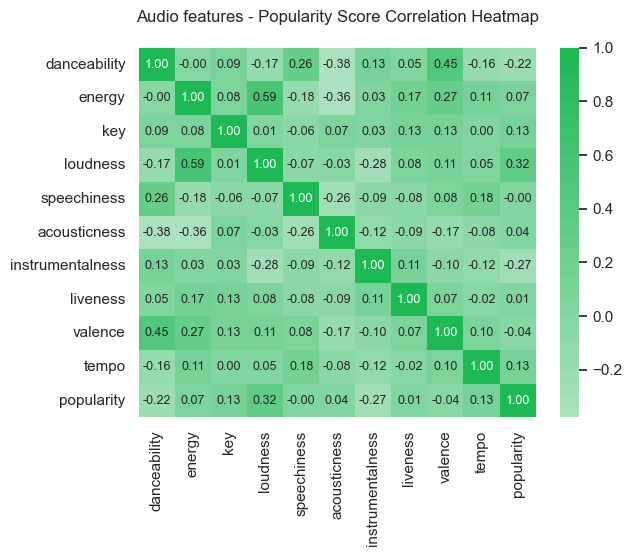

In [231]:
# Extract the relevant columns for analysis from df

attributes = ["danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
data = df[attributes + ['popularity']]

# Compute the correlation matrix 
corr_matrix = data.corr()
color = '#1DB954'

# Create a custom color map with a single color '#1DB954'
#cmap = sns.diverging_palette(120, 20, s=75, l=50, center="light", as_cmap=True)
cmap = sns.light_palette(color, n_colors = 40, reverse=False, as_cmap=False, input='rgb')

# Create a heatmap using Seaborn

ax = sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt='.2f', center=0, annot_kws={"size":9})
ax.set_title('Audio features - Popularity Score Correlation Heatmap\n')


ax.figure.savefig('af_pop.pdf', bbox_inches = 'tight')

>We can see how there are not many strong correlations between these variables. However, some pairs have higher coeficients:
 - valence and danceability (0.45)
- energy and loudness (0.59)
- loudness and popularity (0.32)

### Popularity score against release date

In this graph, we would like to show how the release date of the album influences their chances of being in a top50 playlits.

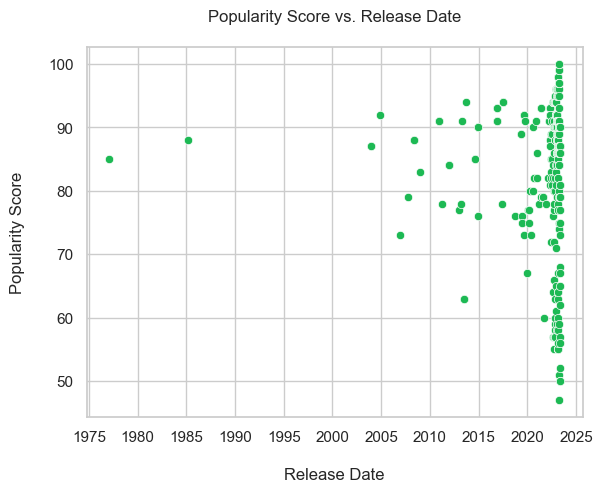

In [232]:
# # Extract the relevant columns for analysis
datedata = df.loc[:,['album_release', 'popularity']]

# Convert the release date column to datetime, handling different formats
def convert_to_datetime(date_str):
    if len(date_str) == 4:  # Only contains the year
        return pd.to_datetime(date_str, format='%Y')
    else:
        return pd.to_datetime(date_str, format='%Y-%m-%d')

# # Convert the release date column to datetime
datedata['album_release'] = datedata['album_release'].apply(convert_to_datetime)

# Sort the data by the release date
datedata = datedata.sort_values('album_release')

# Plot the popularity score against the release date


ax = sns.scatterplot(data = datedata,
                     x= 'album_release', 
                     y = 'popularity', 
                     marker='o', 
                     linestyle='-', 
                     color='#1DB954')


ax.set_xlabel('\nRelease Date')
ax.set_ylabel('Popularity Score\n')
ax.set_title('Popularity Score vs. Release Date\n')
ax.grid(True)

ax.figure.savefig('pop_date.pdf', bbox_inches = 'tight')


>Tracks that were released more than 3 years ago are rarely found in the top 50 playlist. However, something quite interesting is how the popularity of a song can be low for the track to be in the playlist as long as the track was released recently.

We can also remove the outliers to "zoom-in" into the graph

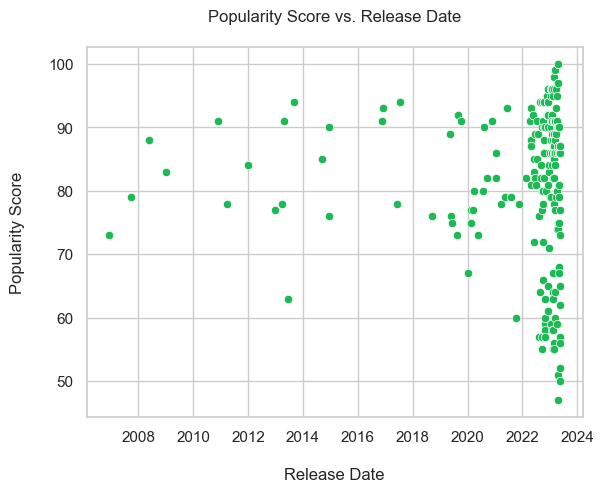

In [233]:
# Filter the data for years greater than or equal to 2005
datedata = datedata[datedata['album_release'].dt.year >= 2005]

# Sort the data by the release date
datedata = datedata.sort_values('album_release')

ax = sns.scatterplot(data = datedata,
                     x= 'album_release', 
                     y = 'popularity', 
                     marker='o', 
                     linestyle='-', 
                     color='#1DB954')


ax.set_xlabel('\nRelease Date')
ax.set_ylabel('Popularity Score\n')
ax.set_title('Popularity Score vs. Release Date\n')
ax.grid(True)

ax.figure.savefig('pop_date-zoom.pdf', bbox_inches = 'tight')

### Audio features across country playlists

The last thing we would like to check for now is if there are differences between countries in the audio feautures of the tracks that make it to th top50 playlists

In [6]:
# Create empty dataframes for each country
glob = df.loc[df['country_playlist'] == 'Global']
USA = df.loc[df['country_playlist'] == 'USA']
UK = df.loc[df['country_playlist'] == 'UK']
SA = df.loc[df['country_playlist'] == 'South Africa']
IN = df.loc[df['country_playlist'] == 'India']
AUS = df.loc[df['country_playlist'] == 'Australia']



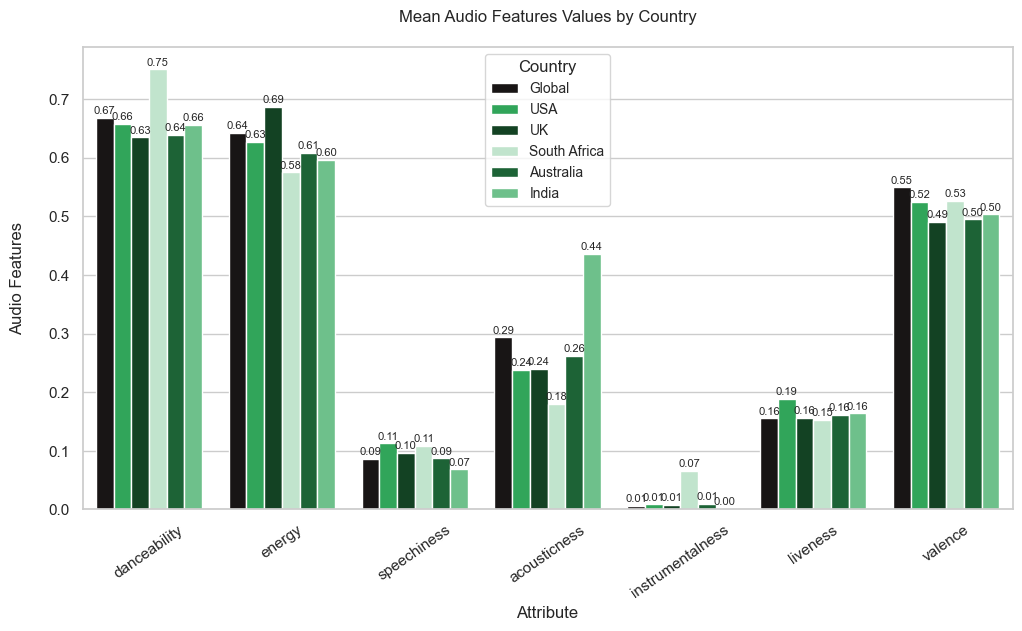

In [14]:
# Numeric attributes

numeric_attributes = ["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]
#"key", "loudness" "tempo" was not included in the following chart

# Initialize an empty list to store the mean values for each attribute and country
mean_data = []

# Calculate the mean value for each attribute and country
for attribute in numeric_attributes:
    attribute_data=[]
    for country, df in zip(['Global', 'USA', 'UK', 'South Africa', 'Australia', 'India'], [glob, USA, UK, SA, AUS, IN]):
        mean_value = df[attribute].mean()
        attribute_data.append(mean_value)
    mean_data.append(attribute_data)

# Convert the list to a DataFrame
mean_data = pd.DataFrame(mean_data,columns=['Global', 'USA', 'UK', 'South Africa', 'Australia', 'India'])
mean_data['Attribute']=numeric_attributes

# Reshape the DataFrame for plotting
mean_data = mean_data.melt(id_vars='Attribute', var_name='Country', value_name='Mean Value')


# Define the custom color palette with 6 colors
custom_palette = ['#191414','#1DB954',  '#0b4a21', '#bbeacb', '#116f32', '#60ce87']


# Set the style of the plot
sns.set(style="whitegrid", palette=custom_palette)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot
ax = sns.barplot(data=mean_data, x='Attribute', y='Mean Value', hue='Country')
ax.set_ylabel('Audio Features\n')
ax.set_title('Mean Audio Features Values by Country\n')
ax.tick_params(axis='x', rotation=35)

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

sns.move_legend(ax, "upper center", title='Country', fontsize=10)


# Save the figure as a PDF
# plt.savefig('audiofeat.pdf', bbox_inches='tight')
plt.show()

>Instrumentalness and danceability seem to be attributes particularly important for the tracks in the South Africa playlist.

> Overall, danceability, energy and valence seem to be important attributes for songs that are featured in the top50 playlist. 

> Acousticness is a relatively important attribute for tracks in the Indian playlist. However, itis relatively less important for the other playlists. 

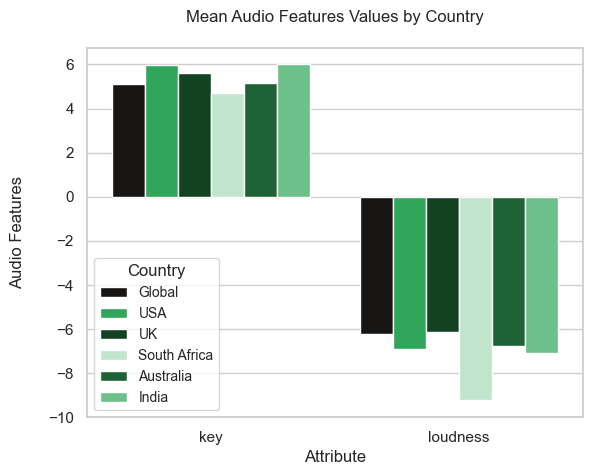

In [236]:
# For key and loudness

numeric_attributes1 = ["key", "loudness"]

# Initialize an empty list to store the mean values for each attribute and country
mean_data = []

# Calculate the mean value for each attribute and country
for attribute in numeric_attributes1:
    attribute_data=[]
    for country, df in zip(['Global', 'USA', 'UK', 'South Africa', 'Australia', 'India'], [glob, USA, UK, SA, AUS, IN]):
        mean_value = df[attribute].mean()
        attribute_data.append(mean_value)
    mean_data.append(attribute_data)

# Convert the list to a DataFrame
mean_data = pd.DataFrame(mean_data,columns=['Global', 'USA', 'UK', 'South Africa', 'Australia', 'India'])
mean_data['Attribute']=numeric_attributes1

# Reshape the DataFrame for plotting
mean_data = mean_data.melt(id_vars='Attribute', var_name='Country', value_name='Mean Value')


# Define the custom color palette with 6 colors
custom_palette = ['#191414','#1DB954',  '#0b4a21', '#bbeacb', '#116f32', '#60ce87']


# Set the style of the plot
sns.set(style="whitegrid", palette=custom_palette)


# Create a bar plot
ax = sns.barplot(data=mean_data, x='Attribute', y='Mean Value', hue='Country')
ax.set_ylabel('Audio Features\n')
ax.set_title('Mean Audio Features Values by Country\n')
ax.tick_params(axis='x', rotation=0)

sns.move_legend(ax, loc = 'lower left', title='Country', fontsize=10)


ax.figure.savefig('keyloud.pdf', bbox_inches = 'tight')

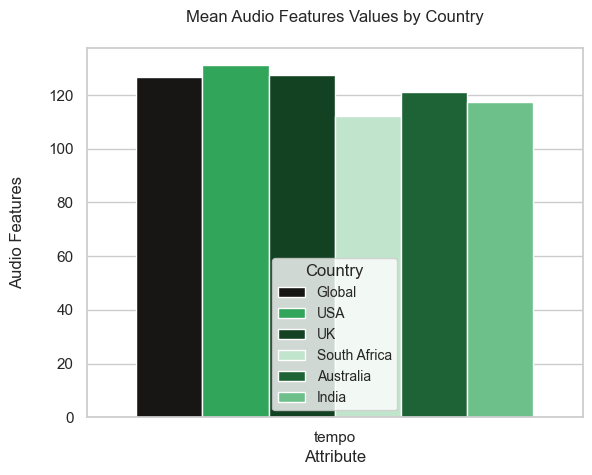

In [237]:
# For tempo

numeric_attributes2 = ["tempo"]

# Initialize an empty list to store the mean values for each attribute and country
mean_data = []

# Calculate the mean value for each attribute and country
for attribute in numeric_attributes2:
    attribute_data=[]
    for country, df in zip(['Global', 'USA', 'UK', 'South Africa', 'Australia', 'India'], [glob, USA, UK, SA, AUS, IN]):
        mean_value = df[attribute].mean()
        attribute_data.append(mean_value)
    mean_data.append(attribute_data)

# Convert the list to a DataFrame
mean_data = pd.DataFrame(mean_data,columns=['Global', 'USA', 'UK', 'South Africa', 'Australia', 'India'])
mean_data['Attribute']=numeric_attributes2

# Reshape the DataFrame for plotting
mean_data = mean_data.melt(id_vars='Attribute', var_name='Country', value_name='Mean Value')


# Define the custom color palette with 6 colors
custom_palette = ['#191414','#1DB954',  '#0b4a21', '#bbeacb', '#116f32', '#60ce87']


# Set the style of the plot
sns.set(style="whitegrid", palette=custom_palette)


# Create a bar plot
ax = sns.barplot(data=mean_data, x='Attribute', y='Mean Value', hue='Country')
ax.set_ylabel('Audio Features\n')
ax.set_title('Mean Audio Features Values by Country\n')
ax.tick_params(axis='x', rotation=0)

sns.move_legend(ax, loc = 'lower center', title='Country', fontsize=10)


ax.figure.savefig('tempo.pdf', bbox_inches = 'tight')

### For attributes that are considerably different from each other

This graphs show the distribution of key attributes for the tracks of each playlist. Key attributes are:

- danceability
- intrumentalness
- acousticness



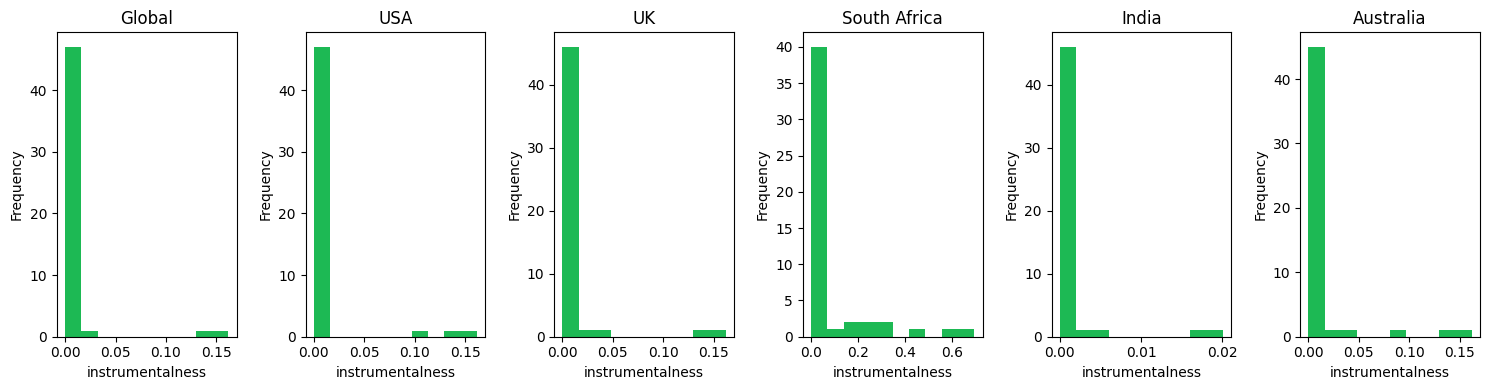

<Figure size 640x480 with 0 Axes>

In [12]:
# Define the variable name
variable_name = 'instrumentalness'

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 4))

# List of dataframes for each country
dfs = [glob, USA, UK, SA, IN, AUS]

# List of country names
countries = ['Global', 'USA', 'UK', 'South Africa', 'India', 'Australia']

# Iterate over the dataframes and create histograms
for i, df in enumerate(dfs):
    # Extract the variable of interest
    variable = df[variable_name]
    
    # Create a histogram on the corresponding subplot
    axes[i].hist(variable, bins=10, color = '#1DB954')  # Adjust the number of bins as needed
    
    # Set the subplot title
    axes[i].set_title(countries[i])
    axes[i].set_xlabel(variable_name)
    axes[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


plt.savefig('hist-inst.pdf', bbox_inches = 'tight')

As it can be observed:

> The score of instrumentalness is overall low for the tracks across playlists.

> Only South African have a higher instrumentalness score

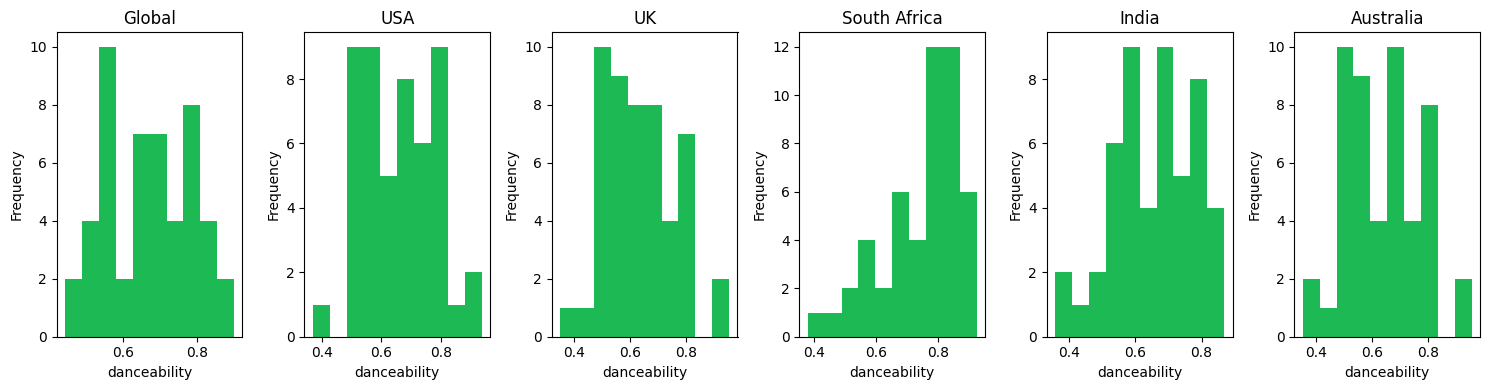

<Figure size 640x480 with 0 Axes>

In [13]:
# Define the variable name
variable_name = 'danceability'

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 4))

# List of dataframes for each country
dfs = [glob, USA, UK, SA, IN, AUS]

# List of country names
countries = ['Global', 'USA', 'UK', 'South Africa', 'India', 'Australia']

# Iterate over the dataframes and create histograms
for i, df in enumerate(dfs):
    # Extract the variable of interest
    variable = df[variable_name]
    
    # Create a histogram on the corresponding subplot
    axes[i].hist(variable, bins=10, color = '#1DB954')  # Adjust the number of bins as needed
    
    # Set the subplot title
    axes[i].set_title(countries[i])
    axes[i].set_xlabel(variable_name)
    axes[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

plt.savefig('hist-dance.pdf', bbox_inches = 'tight')

As it can be observed in this visualisation

> Most tracks acrross playlists have high danceability scores.

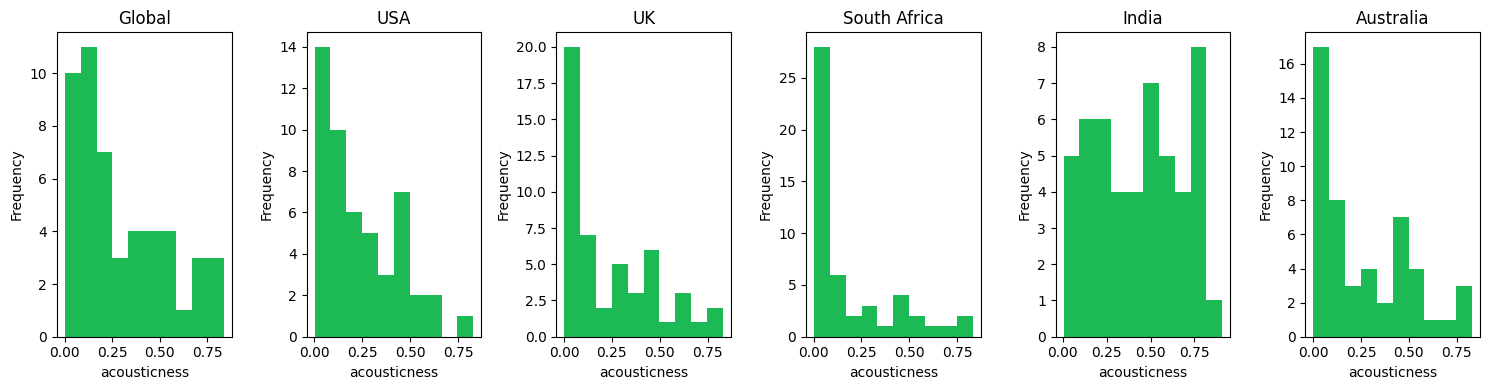

<Figure size 640x480 with 0 Axes>

In [14]:
# Define the variable name
variable_name = 'acousticness'

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 4))

# List of dataframes for each country
dfs = [glob, USA, UK, SA, IN, AUS]

# List of country names
countries = ['Global', 'USA', 'UK', 'South Africa', 'India', 'Australia']

# Iterate over the dataframes and create histograms
for i, df in enumerate(dfs):
    # Extract the variable of interest
    variable = df[variable_name]
    
    # Create a histogram on the corresponding subplot
    axes[i].hist(variable, bins=10, color = '#1DB954')  # Adjust the number of bins as needed
    
    # Set the subplot title
    axes[i].set_title(countries[i])
    axes[i].set_xlabel(variable_name)
    axes[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

plt.savefig('hist-acoust.pdf', bbox_inches = 'tight')

> Finally, these histograms showed how most tracks have low accousticness scores.

> India is an exception for this. In the Indian playlists, accousticness scores are particularly high for a great number of the tracks in the playlist

### Key atributes against popularity


The selection of these attributes is based on some of the results obtained above. We will plot the popularity score against the attributes in multiple scatter plots, see if theres a correlation between popularity and these variables:

- danceability
- valence
- loudness
- instrumentalness


> Note that the rainbow palette is selected in this case as oppossed to Spotify colours to improve readibility of the graph

Starting with **danceability** and **popularity**:

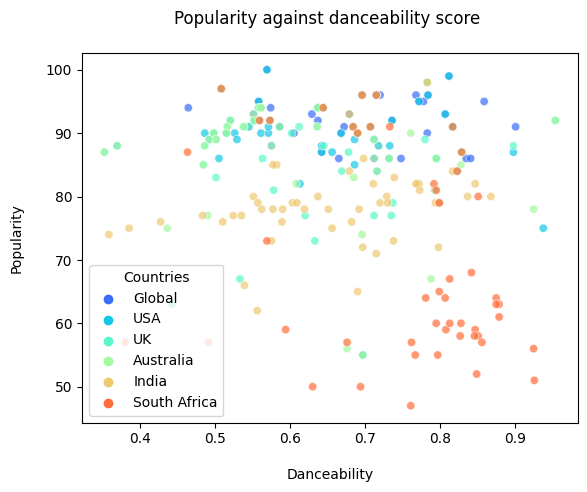

In [141]:
custom_palette = ['#191414','#1DB954',  '#0b4a21', '#bbeacb', '#116f32', '#60ce87']

ax = sns.scatterplot(data=df, x='danceability', y='popularity', 
                     hue='country_playlist', palette='rainbow',
                     alpha=0.7)

ax.set_xlabel('\nDanceability')
ax.set_ylabel('Popularity\n')
ax.set_title('Popularity against danceability score \n')
ax.legend(loc='best', title='Countries')

ax.figure.savefig('danc-pop.pdf', bbox_inches = 'tight')

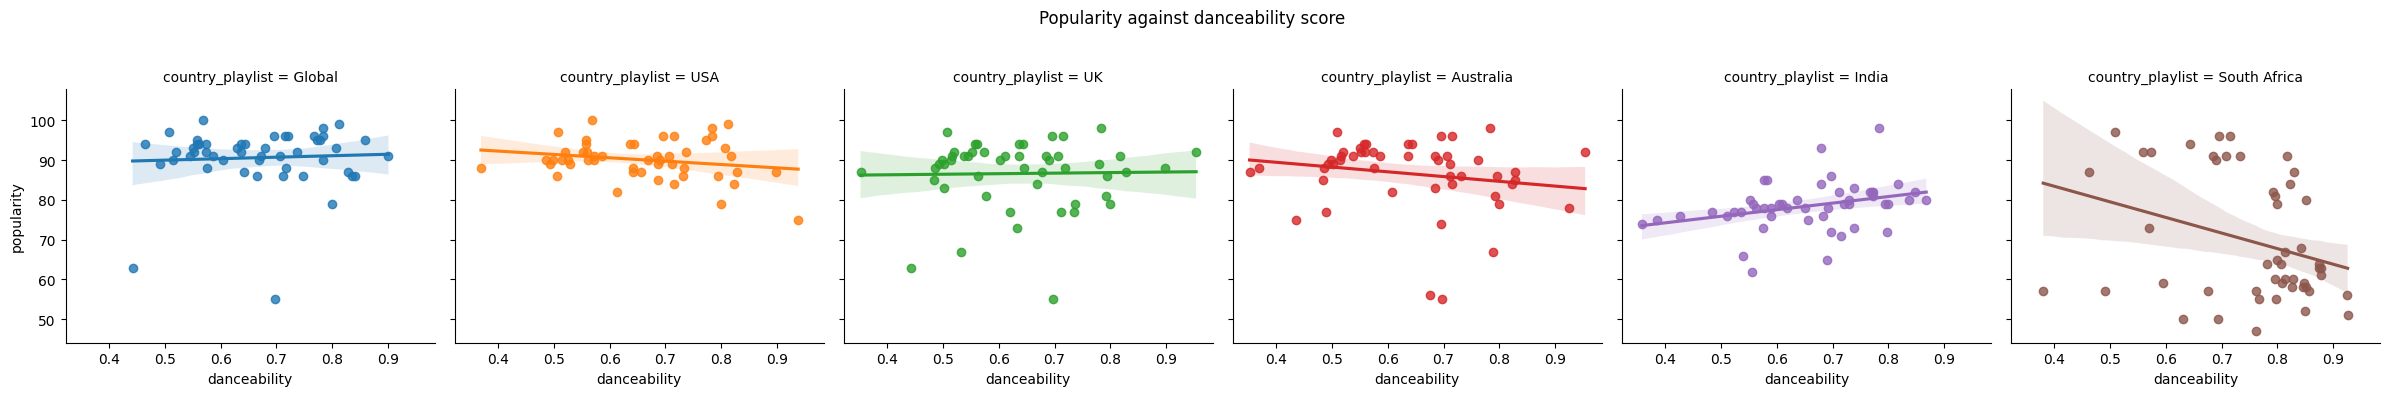

In [140]:
ax = sns.lmplot(x ='danceability', y ='popularity',
           col = "country_playlist", hue = "country_playlist",
           data = df, 
           height=4)


ax.figure.suptitle('Popularity against danceability score \n')
ax.figure.tight_layout()



ax.figure.savefig('danc-pop-country.pdf', bbox_inches = 'tight')

>Based on both graphs graph, it sems like there are no correlations between danceability and popularity, except for India. 

>In the case of South Africa, danceability is an important attribute of the songs, but these does not necessarily mean the tracks are popular

We decided to calculate R to confirm this results:

In [25]:
r, p = sp.stats.pearsonr(df['popularity'], df['danceability'])


r

-0.21643947093300028

> The R using all available data between danceability and popularity is not only very low but also negative, confirming that there is a very weak negative correlation between dancebility and popularity. 


However, the graph for **India** suggests that there may be some corraltion. We decided to look into it but using only the data for India:

In [27]:
r, p = sp.stats.pearsonr(IN['popularity'], IN['danceability'])

r

0.3276436298026298

In the graph it seem like there  could have been a correlation between danceability and popularity in the case of India.

> Based on the value of r, there seems like there is a positive correlation between danceability and popularity of the tracks for the Indian data. However, such correlation is still very weak.

For **valence** and **popularity**:

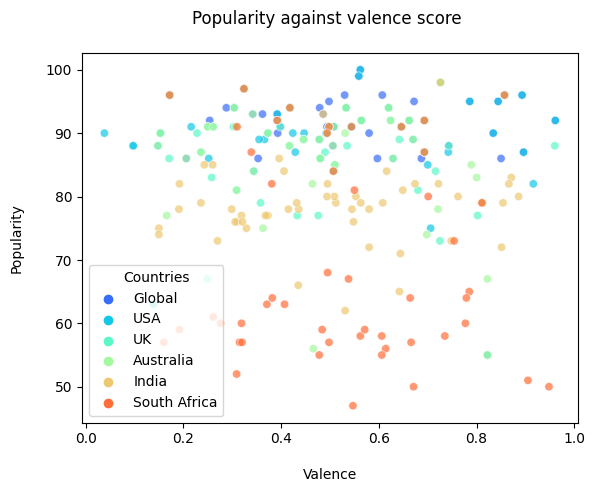

In [142]:
ax = sns.scatterplot(data=df, x='valence', y='popularity', 
                     hue='country_playlist', palette='rainbow', 
                     alpha=0.7)


ax.set_xlabel('\nValence')
ax.set_ylabel('Popularity\n')
ax.set_title('Popularity against valence score \n')
ax.legend(loc='best', title='Countries')


ax.figure.savefig('val-pop.pdf', bbox_inches = 'tight')

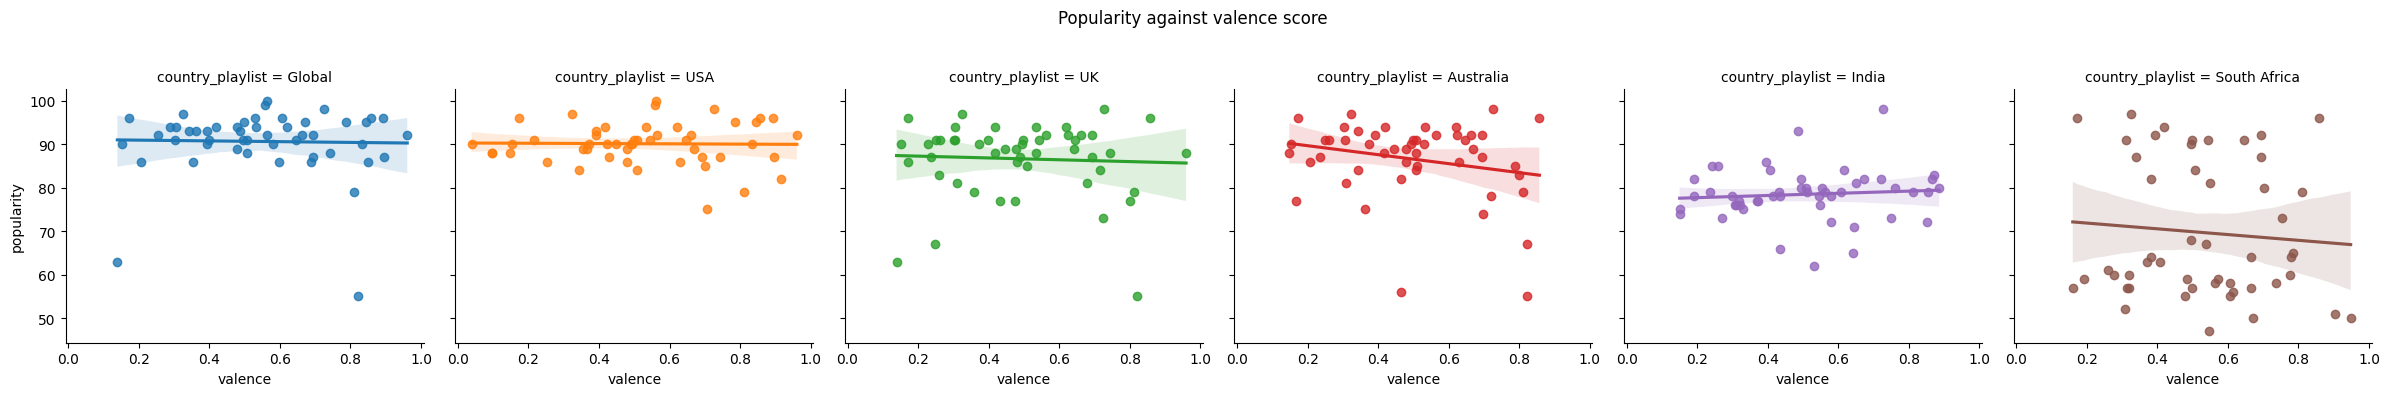

In [144]:
ax = sns.lmplot(x ='valence', y ='popularity',
           col = "country_playlist", hue = "country_playlist",
           data = df, 
           height=4)


ax.figure.suptitle('Popularity against valence score \n')
ax.figure.tight_layout()



ax.figure.savefig('val-pop-country.pdf', bbox_inches = 'tight')

>Again, same results, valence does not seem to be correlated with popularity.

However, let's confirmed this by calculating the normal correlation coeficient:

In [7]:
r, p = sp.stats.pearsonr(df['popularity'], df['valence'])

r

-0.04183477771335499

>As predicted, based on r there is an extremely weak and negative correlation between valence and popularity

Checking for **loudness** and **popularity**:

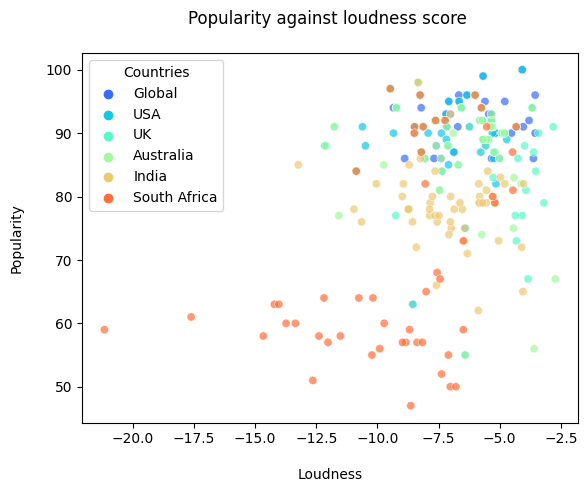

In [145]:
ax = sns.scatterplot(data=df, x='loudness', y='popularity', 
                     hue='country_playlist', palette='rainbow', 
                     alpha=0.7)



ax.set_xlabel('\nLoudness')
ax.set_ylabel('Popularity\n')
ax.set_title('Popularity against loudness score \n')
ax.legend(loc='best', title='Countries')

ax.figure.savefig('loud-pop.pdf', bbox_inches = 'tight')

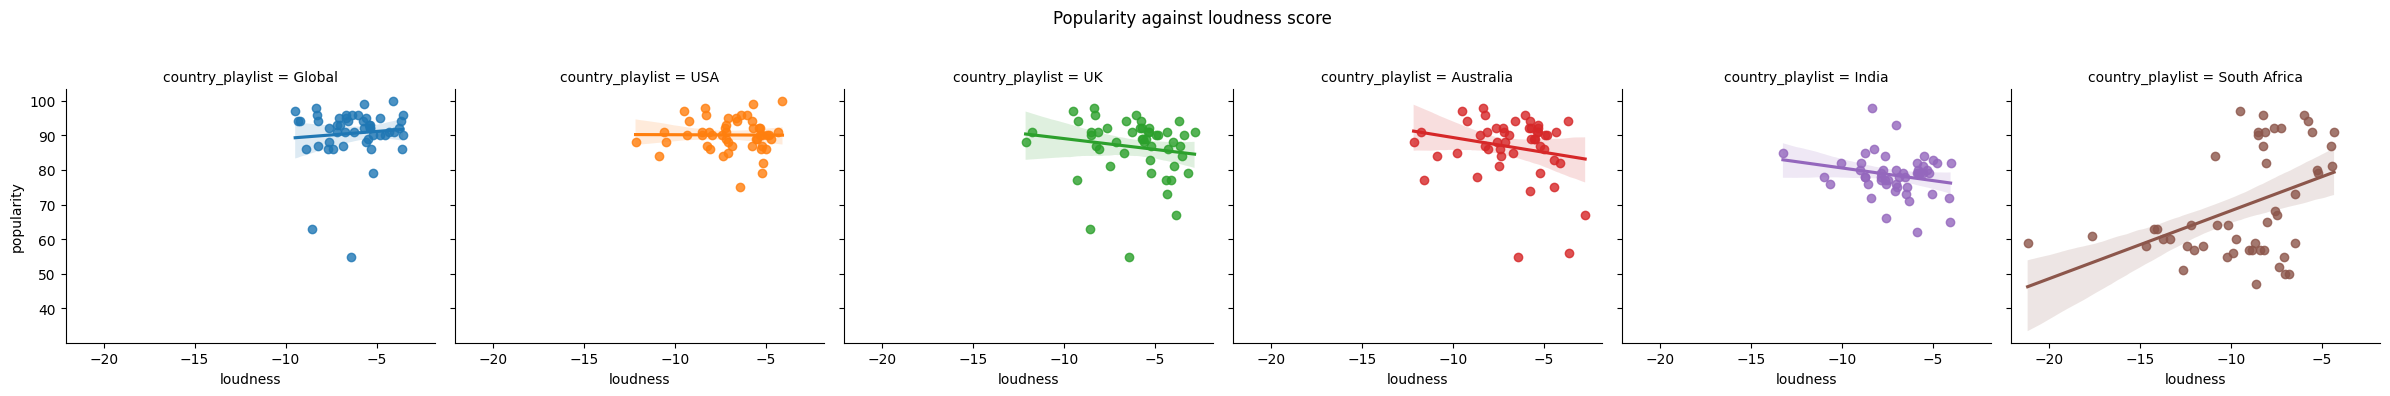

In [146]:
ax = sns.lmplot(x ='loudness', y ='popularity',
           col = "country_playlist", hue = "country_playlist",
           data = df, 
           height=4)


ax.figure.suptitle('Popularity against loudness score \n')
ax.figure.tight_layout()



ax.figure.savefig('loud-pop-country.pdf', bbox_inches = 'tight')

> Graphs seem to indicate that for all playlists (except South Africa) the most popular songs have a high valence. 


It was difficult to see if there were any correlations between loudness and popularity simply by looking at the graphs. R would help with that:

In [15]:
r, p = sp.stats.pearsonr(df['popularity'], df['loudness'])


r

0.15119643975469876

> There seems to be a positive but weak correlation between loudness and popularity

For **instrumentalness** and **popularity**:

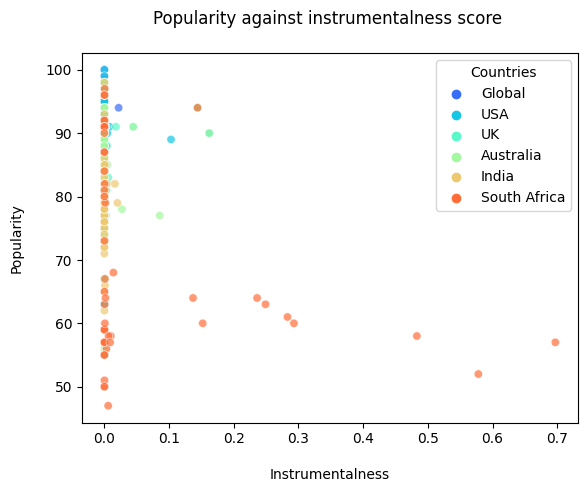

In [149]:
ax = sns.scatterplot(data=df, x='instrumentalness', y='popularity', 
                     hue='country_playlist', palette='rainbow', 
                     alpha=0.7)



ax.set_xlabel('\nInstrumentalness')
ax.set_ylabel('Popularity\n')
ax.set_title('Popularity against instrumentalness score \n')
ax.legend(loc='best', title='Countries')

ax.figure.savefig('inst-pop.pdf', bbox_inches = 'tight')

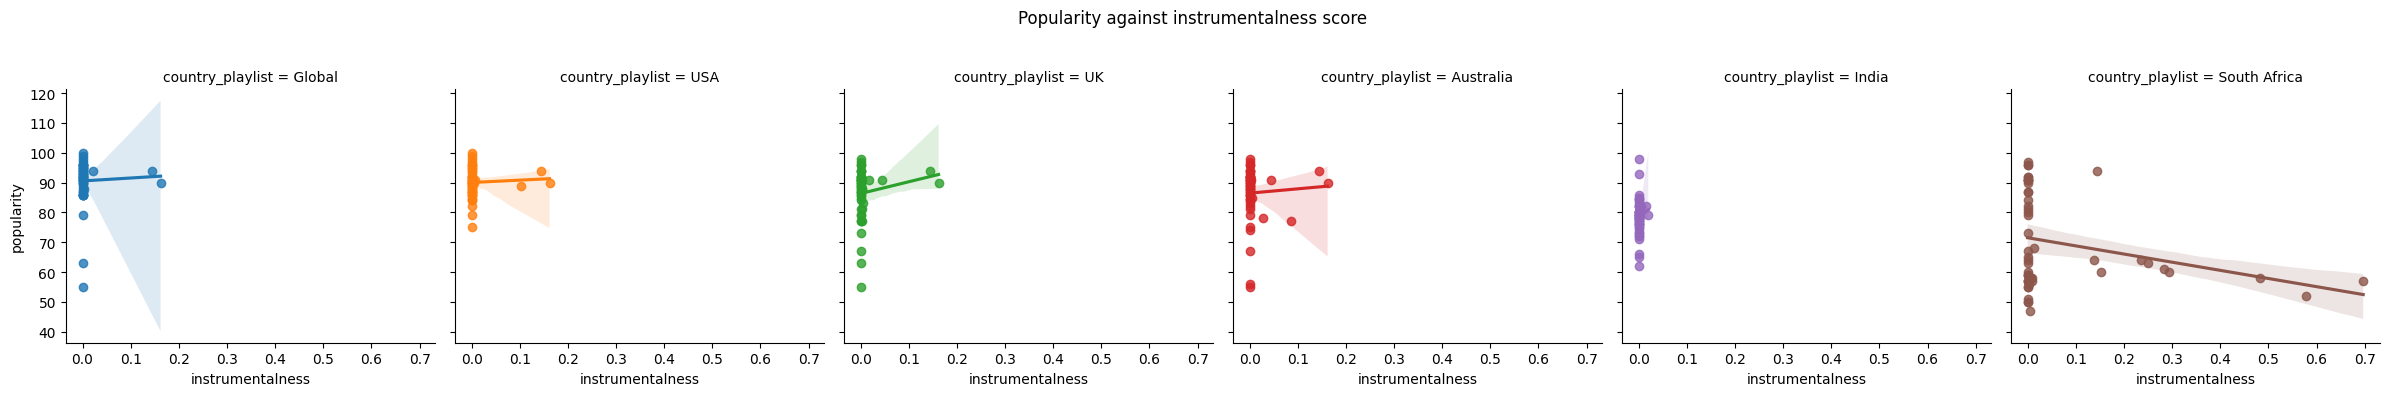

In [150]:
ax = sns.lmplot(x ='instrumentalness', y ='popularity',
           col = "country_playlist", hue = "country_playlist",
           data = df, 
           height=4)


ax.figure.suptitle('Popularity against instrumentalness score \n')
ax.figure.tight_layout()



ax.figure.savefig('inst-pop-country.pdf', bbox_inches = 'tight')

> Overall, graphs don't seem to show any correlation between instrumentalness and popularity. However, South Africa seem to be an exception for this. 

Let's calculate R to confirm this findings:


In [16]:
r, p = sp.stats.pearsonr(df['popularity'], df['instrumentalness'])


r

0.7153428621022674

> Confirming results from the graphs, there is a negative but weak correlation between instrumentalness and popularity using data from all the playlists. 


Let's now look at **South Africa** in isolation:

In [10]:
r, p = sp.stats.pearsonr(SA['popularity'], SA['instrumentalness'])

r

-0.2719694279269254

>Despite whay may look in the graph like a diference, the R is actually very similar to the obtained using all available data. Correlation between popularity and instrumntalness is negative AND weak for South Africa tracks too. 

# Model building


We want to build two models using different attributes, and we inputed the target value which is popularity.

In [12]:
# Select the features to be scaled
scaled_features = ['key', 'tempo', 'loudness']

# Select the features that don't need scaling
unscaled_features = ['danceability', 'instrumentalness', 'energy', 'acousticness', 'liveness', 'valence']

# Split the data into features (X) and target variable (y)
X_scaled = df[scaled_features]
X_unscaled = df[unscaled_features]
y = df['popularity']

# Split the scaled and unscaled features into train and test sets
X_scaled_train, X_scaled_test, X_unscaled_train, X_unscaled_test, y_train, y_test = train_test_split(
    X_scaled, X_unscaled, y, test_size=0.2, random_state=5)

# Standardize the scaled features
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_scaled_train)
X_scaled_test = scaler.transform(X_scaled_test)

# Combine the scaled and unscaled features
X_train = np.hstack((X_scaled_train, X_unscaled_train))
X_test = np.hstack((X_scaled_test, X_unscaled_test))

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

In [13]:
r2

0.28377634130159834

In [14]:
# Select the features and target variable
features = ['danceability', 'instrumentalness', 'loudness', 'key', 'tempo','energy', 'acousticness']
X = df[features]
y = df['popularity']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Scale the features to the range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using r2 score
r2 = r2_score(y_test, y_pred)

In [15]:
r2

0.32504725827422454

> As we can see from the R2 values obtained (both between 0.2 and 0.3), the two models are not very accurate at predicting the popularity of the tracks.